# Quicklook Map Example


### Load in the libraries that we'll use below:

In [1]:
import sys
from os.path import *
import os

from astropy.io import fits
import astropy.units as u

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import LogNorm
from pylab import figure, cm
%matplotlib inline

import numpy as np

import nustar_pysolar as nustar

### Load in the data

In [2]:
#infile = '../data/Sol_16208/20201001001/event_cl/nu20201001001A06_chu12_N_cl_sunpos.evt'
infile = '../data/Sol_16208/20201001001/event_cl/nu20201001001B06_chu3_N_cl_sunpos.evt'

hdulist = fits.open(infile)
evtdata=hdulist[1].data
hdr = hdulist[1].header
print("Loaded: ", len(evtdata['X']), " counts.")
print("Effective exposure: ", hdr['EXPOSURE'], ' seconds')
hdulist.close()


Loaded:  390383  counts.
Effective exposure:  52.1997515275288  seconds


### Do some quick filtering.

The default here is to filter on 2.5--10 keV, only select Grade 0 events, and reject events from known hot pixels.

See the documentation for filter.event_filter for more info. (which I need to write still...)

In [3]:
cleanevt = nustar.filter.event_filter(evtdata)

### Construct a map object compatible with sunpy

In [4]:
nustar_map = nustar.map.make_sunpy(cleanevt, hdr)

### If you want to save the map for later, do that here

In [ ]:
# Make the new filename:
(sfile, ext)=splitext(infile)
outfile=sfile+'_map.fits'

# Remove output file if necessary
if isfile(outfile):
  print(outfile, 'exists! Removing old version...')
  os.remove(outfile)
nustar_map.save(outfile, filetype='auto')



### Take a peak and see what you've got.

/Users/bwgref/science/local/anaconda/lib/python3.5/site-packages/sunpy/map/mapbase.py:1590: Warning: WCSAxes is installed but not being used. Plots may not have the expected behaviour.
  Warning)


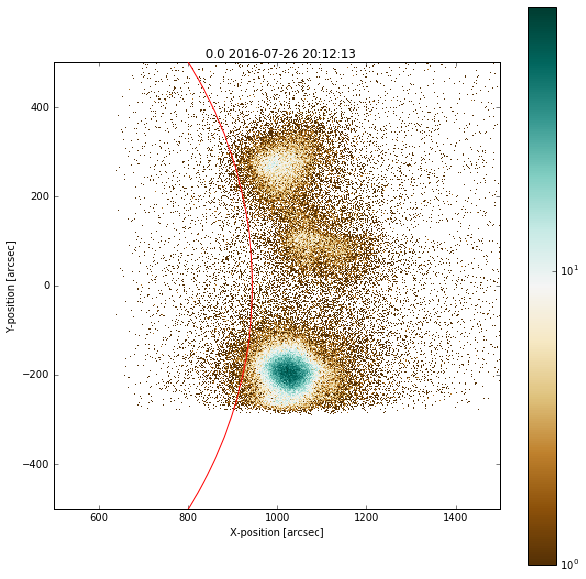

In [5]:
rangex = u.Quantity([500*u.arcsec, 1500 * u.arcsec])
rangey = u.Quantity([-500 * u.arcsec, 500 * u.arcsec])

nustar_map.plot_settings['norm'] = colors.LogNorm(1.0, nustar_map.max())
nustar_map.plot_settings['cmap'] = cm.get_cmap('BrBG')

nustar_submap = nustar_map.submap(rangex, rangey)


plt.subplots(figsize=(10, 10))
nustar_submap.plot()
plt.colorbar()
nustar_submap.draw_limb(color='r')
